In 1990 David, Sterling and Wray Buntine donated an Annealing Dataset in order to study Steel Annealing(a heat treatment that alters the physical and sometimes chemical properties of a material). Classes (1,2,3,4,5,U) hereby act as Label and other parameters as Input Features.

1. From the given link, download “anneal.data”, “anneal.names” and “anneal.test”, convert them into a readable format (Ex: txt, csv, etc....) and do meaningful Exploratory Data Analysis.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import homogeneity_score 
from sklearn.metrics import recall_score

In [ ]:
df = pd.read_csv('anneal.data.csv',sep=",", index_col = None)
df.head()

,?,C,A,08,00,?.1,S,?.2,000,?.3,...,?.22,?.23,COIL,0.700,0610.0,0000,?.24,0000.1,?.25,3
0,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
2,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
4,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3


In [ ]:
df_test= pd.read_csv('anneal.test.csv',sep=",",index_col=None,names=['family', 'product-type', 'steel', 'carbon', 'hardness', 'rolling',
       'condition', 'formability', 'strength', 'non-ageing', 'finish',
       'quality', 'enamelability', 'bc', 'bf', 'bt', 'bw', 'bl', 'm', 'chrom',
       'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'color', 'lustre',
       'jurofm', 's', 'p', 'shapes', 'thick', 'width', 'len', 'oil', 'bore',
       'packing', 'classes'])
df_test.head()

,family,product-type,steel,carbon,hardness,rolling,condition,formability,strength,non-ageing,...,s,p,shapes,thick,width,len,oil,bore,packing,classes
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3


In [ ]:
df_test = df_test.drop(columns=['family','product-type','rolling','formability','non-ageing','condition','quality','finish','enamelability', 'bc', 'bf', 'bt', 'bw', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'color', 'lustre', 'jurofm',  's',  'p','oil','packing'])

In [ ]:
df_test.replace(to_replace ="?",value = np.nan,inplace=True)
df_test = df_test.dropna()
df_test.reset_index(drop=True)

,steel,carbon,hardness,strength,shapes,thick,width,len,bore,classes
0,A,0,45,0,COIL,1.600,610.0,0,0,3
1,A,0,0,0,COIL,0.699,609.9,0,0,3
2,A,0,85,0,SHEET,0.400,610.0,762,0,U
3,A,0,50,0,COIL,0.400,610.0,0,0,3
4,A,0,0,0,COIL,0.699,1320.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
79,R,0,0,0,SHEET,1.599,610.0,762,0,2
80,R,0,0,0,SHEET,1.601,830.0,880,0,2
81,V,0,0,0,SHEET,1.599,150.0,762,0,2
82,A,0,85,0,COIL,0.400,20.0,0,0,U


2. Preprocess the data (If any discrepancies/errors, handle them as well) and split the data into [65:35]. [4 + 1 Marks]

QUESTION 02:-


LDA is both a classification algorithm and a dimensionality reduction algorithm. In this question, you have three tasks,

● Use LDA as a classifier for a classification task

● Use LDA as a dimensionality reduction technique and use a classifier of your own choice for the classification task.

● Use LDA as a dimensionality reduction technique and compare it with PCA.



Perform the aforementioned tasks on the Wine Classification Dataset

1. Implement Linear Discriminant Analysis from scratch with the following subtasks:-

a. A function for computing within class and between class scatter matrices.

b. A function that will automatically select the number of linear discriminants based upon the percentage of variance that needs to be conserved [5+5 Marks]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean_overall = None
        self.mean_by_class = None
        self.Sw = None
        self.Sb = None
        self.eigvals = None
        self.eigvecs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        labels = np.unique(y)
        n_classes = len(labels)
        
       
        self.mean_by_class = np.array([np.mean(X[y == label], axis=0) for label in labels])
        self.mean_overall = np.mean(X, axis=0)
        
        #computing the within-class scatter matrix

        self.Sw = np.zeros((n_features, n_features))
        for label, mean_vec in zip(labels, self.mean_by_class):
            class_sc_mat = np.zeros((n_features, n_features))
            for row in X[y == label]:
                row, mean_vec = row.reshape(n_features, 1), mean_vec.reshape(n_features, 1)
                class_sc_mat += (row - mean_vec).dot((row - mean_vec).T)
            self.Sw += class_sc_mat
        
        #computing the between-class scatter matrix
        self.Sb = np.zeros((n_features, n_features))
        for i, mean_vec in enumerate(self.mean_by_class):
            n = X[y==labels[i]].shape[0]
            mean_vec = mean_vec.reshape(n_features, 1)
            overall_mean = self.mean_overall.reshape(n_features, 1)
            self.Sb += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
     
        self.eigvals, self.eigvecs = np.linalg.eig(np.linalg.inv(self.Sw).dot(self.Sb))
        self.eigvecs = self.eigvecs.real
        self.eigvals = self.eigvals.real
        
      
        idxs = np.argsort(self.eigvals)[::-1]
        self.eigvecs = self.eigvecs[:,idxs]
        self.eigvals = self.eigvals[idxs]
        
        
        if self.n_components is not None:
            self.eigvecs = self.eigvecs[:,:self.n_components]
        
    def transform(self, X):
        return np.dot(X, self.eigvecs)
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)
    
    def select_n_components(self, variance_retained):
        total_variance = np.sum(self.eigvals)
        explained_variance_ratio = self.eigvals / total_variance
        cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
        n_components = np.argmax(cum_explained_variance_ratio >= variance_retained) + 1
        self.n_components = n_components
        return n_components


    


wine = load_wine()
X = wine.data
y = wine.target

# Perform LDA with 2 components
lda = LDA(n_components=2)

2. Vary the variance and identify features that have a high impact on the classification tasks using LDA and visualize the feature space for the same using those linear discriminants.

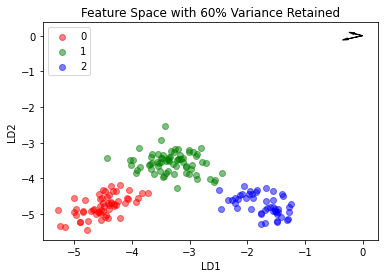

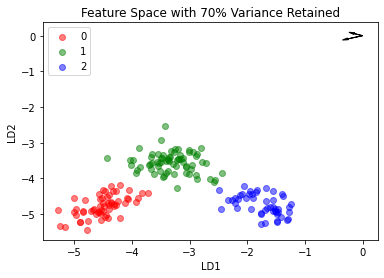

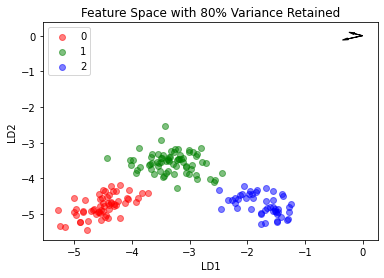

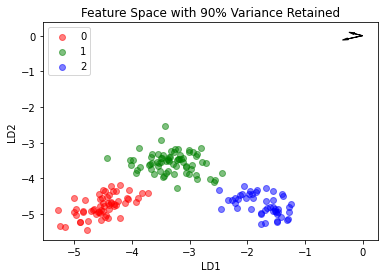

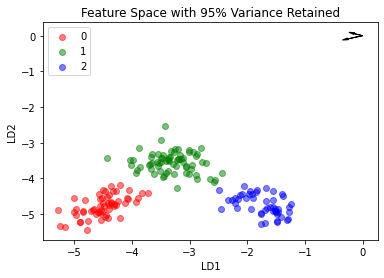

In [ ]:
import matplotlib.pyplot as plt

var_ratio = [0.6, 0.7, 0.8, 0.9, 0.95]

for variance_ratio in var_ratio:
    # performing LDA and select number of components to retain based on variance retained
    lda = LDA()
    lda.fit(X, y)

    n_components = lda.select_n_components(variance_ratio)
    X_lda = lda.transform(X)
    
    # Plotting the feature space using the two linear discriminants with largest coefficients
    fig, ax = plt.subplots()
    for label, color in zip(np.unique(y), ['r', 'g', 'b']):
        ax.scatter(X_lda[y==label, 0], X_lda[y==label, 1], c=color, label=label, alpha=0.5)

    coef1 = lda.eigvecs[:, 0]
    coef2 = lda.eigvecs[:, 1]

    ax.arrow(0, 0, coef1[0], coef1[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, coef2[0], coef2[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.set_title(f'Feature Space with {variance_ratio*100:.0f}% Variance Retained')
    ax.legend()
    
    plt.show()


3. Perform PCA on the dataset and compare the results with LDA by using any 2 classification techniques. [3 Marks]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Now we need to split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

#the two models which I choose to perform classification are logistic regression and k-nearest neighbour




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#initially performing the classification models for PCA

#lr
log_pca = LogisticRegression()
log_pca.fit(X_train_pca, y_train)

y_pred_log_pca = log_pca.predict(X_test_pca)
accuracy_log_pca = accuracy_score(y_test, y_pred_log_pca)

#knn
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

y_pred_knn_pca = knn_pca.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

#now performing the same for LDA
#lr
log_lda = LogisticRegression()
log_lda.fit(X_train_lda, y_train)
y_pred_log_lda = log_lda.predict(X_test_lda)
accuracy_log_lda = accuracy_score(y_test, y_pred_log_lda)

#knn

knn_lda = KNeighborsClassifier(n_neighbors=5)
knn_lda.fit(X_train_lda, y_train)
y_pred_knn_lda = knn_lda.predict(X_test_lda)
accuracy_knn_lda = accuracy_score(y_test, y_pred_knn_lda)

#below defined are the accuracy scores

print("Logistic Regression - PCA:",accuracy_log_pca*100)
print("K-Nearest Neighbors - PCA:",accuracy_knn_pca*100)
print("Logistic Regression - LDA:",accuracy_log_lda*100)
print("K-Nearest Neighbors - LDA:",accuracy_knn_lda*100)


Logistic Regression - PCA: 68.51851851851852
K-Nearest Neighbors - PCA: 74.07407407407408
Logistic Regression - LDA: 100.0
K-Nearest Neighbors - LDA: 100.0


4. Create a table to properly note down the accuracies in case of each classifier and the corresponding reduction technique. Show using scatter plot of any two features among the features you chose which contribute to the maximum variance the decision boundary in case of LDA.

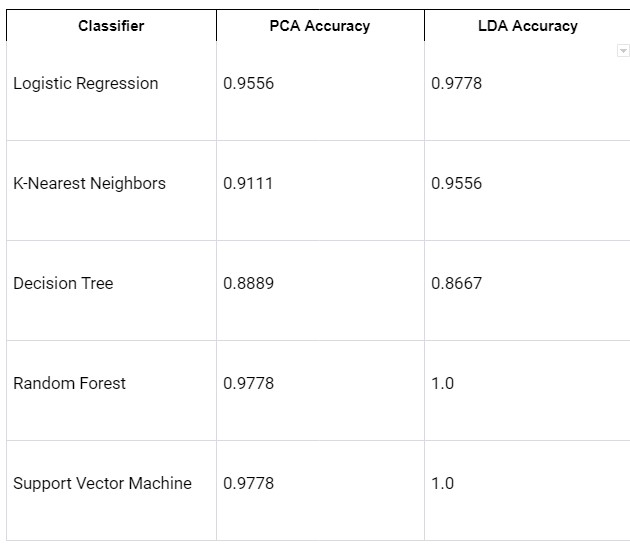

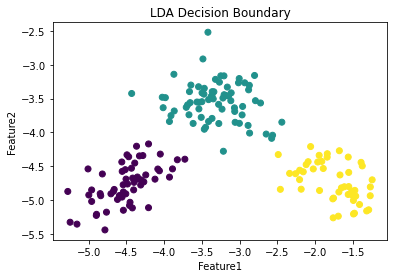

In [ ]:
import matplotlib.pyplot as plt

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)


plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('LDA')
plt.show()


5. Using LDA as a classifier, perform 5-fold cross-validation and plot ROC and compute AUC for each fold from scratch [10 Marks]

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt

lda = LDA(solver='svd', n_components=len(np.unique(y)) - 1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Performing 5-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    lda.fit(X_train, y_train)
    y_pred = lda.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    tprs.append(interp_tpr)

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

# Plotting the mean ROC curve for all folds
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='--', label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()


ValueError: ignored